<a href="https://colab.research.google.com/github/WendyOira/MCHEZOPESA-FOOTBALL-PREDICTION/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2022_2_Wendy_Oira_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Introduction**

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

##**Research Question**

1. Predict how many goals the home team scores.

2. Predict how many goals the away team scores.

3. Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

##**Defining the metric for success**
Create a models that successfully predicts how many goals the home team scores, how many goals the away team scores and determine from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

##**Recording the experimental design**
Reading the datasets into our notebook
Perform EDA

Check multicollinearity

Build polynomial regression model
Perform Cross validation
Perform any necessary Feature Engineering

Build a Logistic Regression Model

Perform hyperparameter tuning for the Logistic Regression Model.


In [ ]:
# Import the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the fifa ranking dataset
rank = pd.read_csv('/content/fifa_ranking.csv')

In [ ]:
# Determining the no. of records in our dataset
rank.shape

(57793, 16)

We have 57793 records and 16 variables

In [ ]:
# Previewing the top of our dataset
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# Previewing the bottom of our dataset
rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
# Checking whether each column has an appropriate datatype
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
# Checking statistical information
rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [ ]:
# Checking the column names in rank dataset
print('The column names in the rank dataset are :')
rank.columns

The column names in the rank dataset are :


Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
# Checking for null values
rank.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

There are no null values 

In [ ]:
# Check for duplicate values 
rank.duplicated().sum()

37

We have 37 duplicates

In [ ]:
# Identify the exact duplicated rows
duplicate = rank[rank.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21
41536,120,Sudan,SDN,264.81,297,-7,129.14,129.14,163.12,81.56,40.91,12.27,209.21,41.84,CAF,2012-01-18
41736,111,Sudan,SDN,301.67,265,9,156.34,156.34,163.12,81.56,40.91,12.27,257.48,51.50,CAF,2012-02-15
41944,110,Sudan,SDN,299.75,302,1,156.34,156.34,163.12,81.56,46.75,14.03,239.09,47.82,CAF,2012-03-07
42157,113,Sudan,SDN,292.03,300,-3,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-04-11
42366,113,Sudan,SDN,292.03,292,0,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-05-09
42562,101,Sudan,SDN,338.25,292,12,179.70,179.70,209.32,104.66,7.08,2.12,258.83,51.77,CAF,2012-06-06
42775,105,Sudan,SDN,329.36,338,-4,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-07-04
42983,104,Sudan,SDN,329.36,329,1,171.57,171.57,229.19,114.60,8.50,2.55,203.22,40.64,CAF,2012-08-08
43193,103,Sudan,SDN,331.79,329,1,169.05,169.05,187.77,93.88,108.13,32.44,182.11,36.42,CAF,2012-09-05


In [ ]:
# Loading results dataset
results = pd.read_csv('/content/results.csv')

In [ ]:
# Determining the no. of records in our dataset
results.shape

(40839, 9)

We have 40,839 records and 9 variables

In [ ]:
# Previewing the top of our dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Previewing the bottom of our dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# Checking whether each column has an appropriate datatype
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
# Checking statistical information
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [ ]:
# Checking columns
print('The column names in the results dataset are :')
results.columns

The column names in the results dataset are :


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
# Checking for null values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
# Checking for duplicate values 
results.duplicated().sum()

0

There are no duplicate values 

##Data Cleaning

In [ ]:
# We will drop columns from rank dataframe that we don't need in our analysis
col = ['country_abrv', 'total_points','previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg','three_year_ago_weighted', 'confederation']

rank_col = rank.drop(columns=col)
rank_col.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [ ]:
# Check the shape of our new dataframe
rank_col.shape

(57793, 3)

The rank_col dataframe has 57793 records and 3 variables

In [ ]:
# Check the datatypes of rank dataframe
rank_col.dtypes

rank             int64
country_full    object
rank_date       object
dtype: object

Rank_date column is object datatype instead of datetime

In [ ]:
# Convert rank_ date from object to datetime
rank_col['rank_date']= pd.to_datetime(rank_col['rank_date'])
# Confirm the changes
rank_col.dtypes

rank                     int64
country_full            object
rank_date       datetime64[ns]
dtype: object

In [ ]:
# Preview our dataframe
rank_col.head()

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08


In [ ]:
# We will create a new column with only the year from our rank_date column
rank_col['year'] = rank_col['rank_date'].dt.year
# Confirm the changes
rank_col.head()

,rank,country_full,rank_date,year
0,1,Germany,1993-08-08,1993
1,2,Italy,1993-08-08,1993
2,3,Switzerland,1993-08-08,1993
3,4,Sweden,1993-08-08,1993
4,5,Argentina,1993-08-08,1993


In [ ]:
# Check the datatypes of rank dataframe
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

date column is in object datatype instead of datetime

In [ ]:
# Convert the date column datatype from object to datetime
results['date']= pd.to_datetime(results['date'])
# Confirm the changes
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [ ]:
# View our dataframe
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
# We will create a new column with only the year from our rank_date column
results['year'] = results['date'].dt.year
# Confirm the changes
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


In [ ]:
rank_col.columns

Index(['rank', 'country_full', 'rank_date', 'year'], dtype='object')

In [ ]:
# Check for unique values in both dataframes inorder to identify any annomalies
columns = ['rank', 'country_full', 'rank_date', 'year']
for i in columns:
  print('Unique values in', i , 'are :')
  print(rank_col[i].unique())
  print('                                                                           ')
  print('***************************************************************************')


Unique values in rank are :
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 147 168 169 170 171 172 173 174 176 175 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 207 206 208 209]
                                                                           
***********************************************

In [ ]:
# Check for unique values in both dataframes inorder to identify any annomalies
columns_1 = ['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year']
for i in columns_1:
  print('Unique values in', i , 'are :')
  print(results[i].unique())
  print('***************************************************************************')
  print('                                                                  ')


Unique values in date are :
['1872-11-30T00:00:00.000000000' '1873-03-08T00:00:00.000000000'
 '1874-03-07T00:00:00.000000000' ... '2019-07-18T00:00:00.000000000'
 '2019-07-19T00:00:00.000000000' '2019-07-20T00:00:00.000000000']
***************************************************************************
                                                                  
Unique values in home_team are :
['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jama

In [ ]:
# We will merge our dataframes to get the rankings of the home teams
home_df = pd.merge(results, rank_col, how = 'inner', left_on=['date', 'home_team'], right_on=['rank_date', 'country_full'])
home_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year_x,rank,country_full,rank_date,year_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,59,Bolivia,1993-08-08,1993
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8,Brazil,1993-08-08,1993
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,35,Ecuador,1993-08-08,1993
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,65,Guinea,1993-08-08,1993
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,67,Paraguay,1993-08-08,1993


In [ ]:
# We will merge our dataframes to get the rankings of the away teams
away_df = pd.merge(results, rank_col, how = 'inner', left_on=['date', 'away_team'], right_on=['rank_date', 'country_full'])
away_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year_x,rank,country_full,rank_date,year_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,22,Uruguay,1993-08-08,1993
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,14,Mexico,1993-08-08,1993
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,94,Venezuela,1993-08-08,1993
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,86,Sierra Leone,1993-08-08,1993
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,5,Argentina,1993-08-08,1993


In [ ]:
# We will merge the home and away dataframes 
merged = pd.merge(home_df, away_df, how='inner', left_on=['date','home_team', 'away_team','home_score','away_score'], right_on=['date','home_team','away_team', 
                                                  'home_score', 'away_score']) 
merged.head()                                                                      

,date,home_team,away_team,home_score,away_score,tournament_x,city_x,country_x,neutral_x,year_x_x,rank_x,country_full_x,rank_date_x,year_y_x,tournament_y,city_y,country_y,neutral_y,year_x_y,rank_y,country_full_y,rank_date_y,year_y_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1993,59,Bolivia,1993-08-08,1993,FIFA World Cup qualification,La Paz,Bolivia,False,1993,22,Uruguay,1993-08-08,1993
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8,Brazil,1993-08-08,1993,Friendly,Maceió,Brazil,False,1993,14,Mexico,1993-08-08,1993
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,1993,35,Ecuador,1993-08-08,1993,FIFA World Cup qualification,Quito,Ecuador,False,1993,94,Venezuela,1993-08-08,1993
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,1993,65,Guinea,1993-08-08,1993,Friendly,Conakry,Guinea,False,1993,86,Sierra Leone,1993-08-08,1993
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,67,Paraguay,1993-08-08,1993,FIFA World Cup qualification,Asunción,Paraguay,False,1993,5,Argentina,1993-08-08,1993


In [ ]:
# We will drop columns we will not need and those duplicated in the merge
columns_2 = ['city_x', 'country_x', 'neutral_x', 'year_x_x',
       'country_full_x', 'rank_date_x', 'year_y_x', 'tournament_y','city_y', 'country_y', 'neutral_y',  'country_full_y', 'rank_date_y', 'year_y_y']
merged_final= merged.drop(columns= columns_2)
merged_final.head()

,date,home_team,away_team,home_score,away_score,tournament_x,rank_x,year_x_y,rank_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,1993,22
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,1993,14
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,1993,94
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,1993,86
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,1993,5


In [ ]:
# We will rename some of our columns 
merged_final.rename(columns= {'tournament_x':'tournament', 'rank_x': 'home_team_rank', 'rank_y':'away_team_rank', 'year_x_y':'year'}, inplace= True)
merged_final.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,year,away_team_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,1993,22
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,1993,14
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,1993,94
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,1993,86
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,1993,5


In [ ]:
# Create the status column based on Home team
def my_function(x):
    if x['home_score'] == x['away_score']:
        status = 'Draw'
    elif x['home_score'] > x['away_score']:
        status = 'Win'
    else:
        status = 'loss'
    return status

merged_final['status'] = merged_final.apply(my_function, axis=1)
merged_final.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,year,away_team_rank,status
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,1993,22,Win
1,1993-08-08,Brazil,Mexico,1,1,Friendly,8,1993,14,Draw
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,1993,94,Win
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,65,1993,86,Win
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,1993,5,loss


In [ ]:
# Check for null values in our merged dataframe
merged_final.isnull().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
home_team_rank    0
year              0
away_team_rank    0
status            0
dtype: int64

There are no null values

In [ ]:
# Check for duplicate values in our merged dataframe
merged_final.duplicated().sum()

0

There are no duplicate values

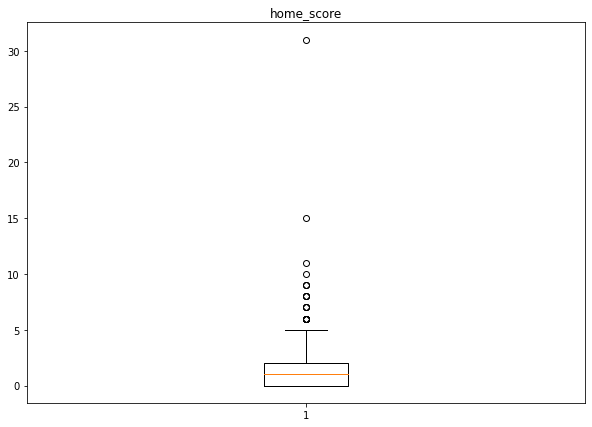

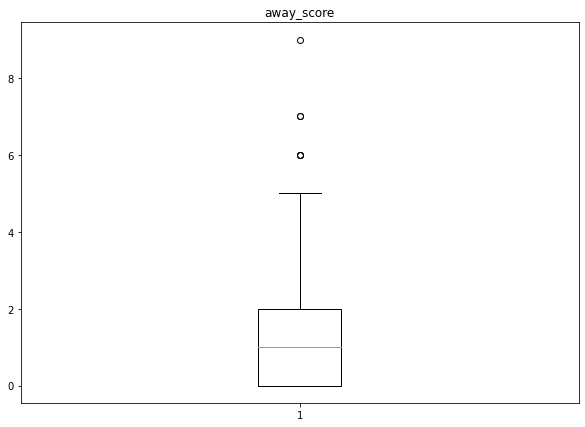

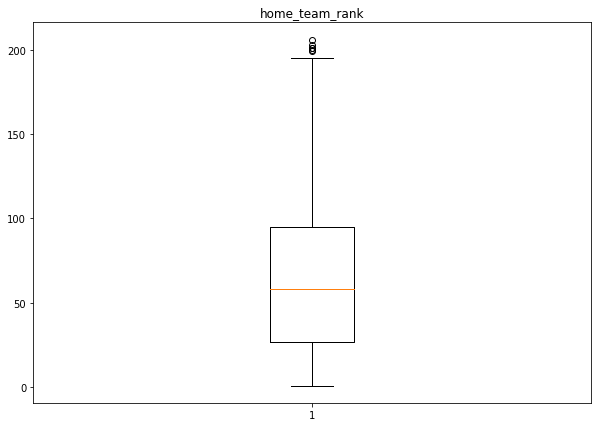

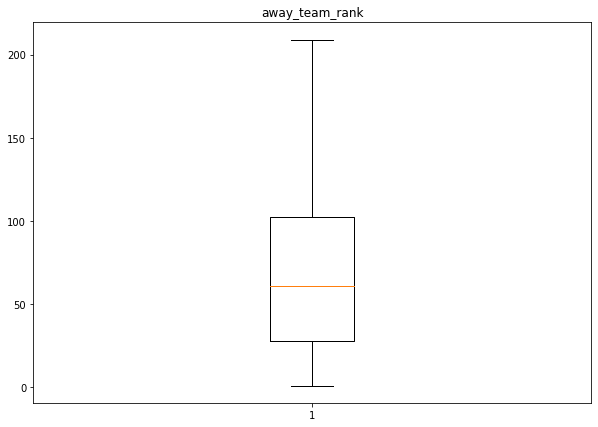

In [ ]:
# We will check for outliers in our numerical columns
columns_3 = ['home_score', 'away_score','home_team_rank', 'away_team_rank']
for i in columns_3:
  fig = plt.figure(figsize = (10,7))
  plt.boxplot(merged_final[i])
  plt.title(i)
  plt.show()

We will not remove any outliers because they represent real life observations

##Exploratory Data Analysis

In [ ]:
# Frequency Table on distribution of tournaments
merged_final.tournament.value_counts().head()

Friendly                           574
FIFA World Cup qualification       134
UEFA Euro qualification             37
AFC Asian Cup qualification         31
Cyprus International Tournament      8
Name: tournament, dtype: int64

Most tournaments played were friendly mathches

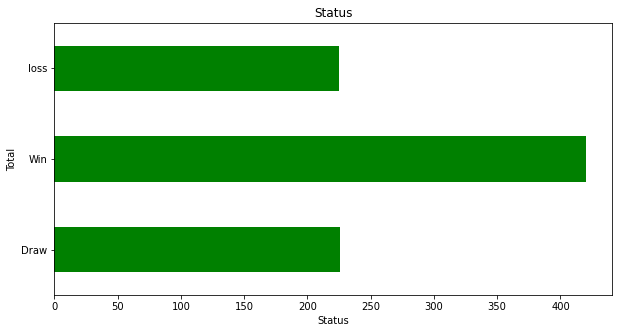

In [ ]:
# Bar chart on Status
plt.figure(figsize = (10,5))
merged_final.groupby('status').size().plot(kind='barh', color='green')
plt.title('Status')
plt.ylabel('Total')
plt.xlabel('Status')
plt.show()

There are more wins compared to losses and draws

<Figure size 1000x300 with 0 Axes>

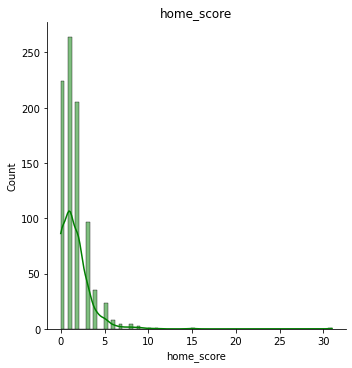

<Figure size 1000x300 with 0 Axes>

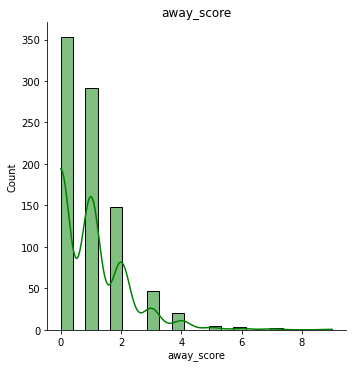

<Figure size 1000x300 with 0 Axes>

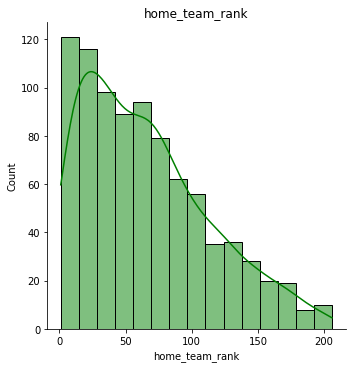

<Figure size 1000x300 with 0 Axes>

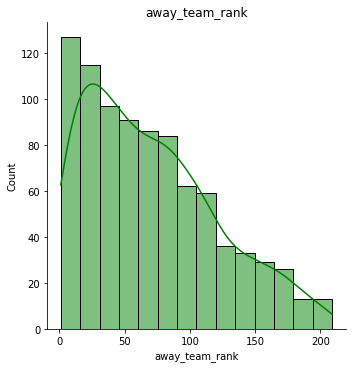

In [ ]:
# Histograms of our numerical values
for i in columns_3:
  plt.figure(figsize = (10,3), dpi=100)
  sns.displot(merged_final[i], kde = True, color = 'green')
  plt.title(i, color = 'Black')
  plt.show()

The numerical data is positively skewed

In [ ]:
# Checking the mean, standard deviation and quantiles of our dataframe
merged_final.describe() 

,home_score,away_score,home_team_rank,year,away_team_rank
count,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1.632606,1.004592,65.549943,2004.789897,69.918485
std,1.905960,1.154691,47.557993,5.405888,50.497652
min,0.000000,0.000000,1.000000,1993.000000,1.000000
25%,0.000000,0.000000,27.000000,2000.000000,28.000000
50%,1.000000,1.000000,58.000000,2005.000000,61.000000
75%,2.000000,2.000000,95.000000,2010.000000,102.500000
max,31.000000,9.000000,206.000000,2018.000000,209.000000


In [ ]:
# Checking the median, mode, varaince, skewness and kurtosis of our dataframe
for i in columns_3:
  print('The median of', i, 'is:')
  print(merged_final[i].median())
  print('The mode of', i, 'is:')
  print(merged_final[i].mode())
  print('The variance of', i, 'is:')
  print(merged_final[i].var())
  print('The skewness of', i, 'is:')
  print(merged_final[i].skew())
  print('The kurtosis of', i, 'is:')
  print(merged_final[i].kurt())
  print('                                    ')
  print('************************************')

The median of home_score is:
1.0
The mode of home_score is:
0    1
dtype: int64
The variance of home_score is:
3.632682740145451
The skewness of home_score is:
5.524378027487252
The kurtosis of home_score is:
68.55786471188763
                                    
************************************
The median of away_score is:
1.0
The mode of away_score is:
0    0
dtype: int64
The variance of away_score is:
1.3333122187471238
The skewness of away_score is:
1.74656856137909
The kurtosis of away_score is:
5.240328362114057
                                    
************************************
The median of home_team_rank is:
58.0
The mode of home_team_rank is:
0    33
dtype: int64
The variance of home_team_rank is:
2261.7627327553205
The skewness of home_team_rank is:
0.7530868154235779
The kurtosis of home_team_rank is:
-0.1488295399350119
                                    
************************************
The median of away_team_rank is:
61.0
The mode of away_team_rank is:
0 

##Bivariate Analysis

In [ ]:
merged_final.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'home_team_rank', 'year', 'away_team_rank', 'status'],
      dtype='object')

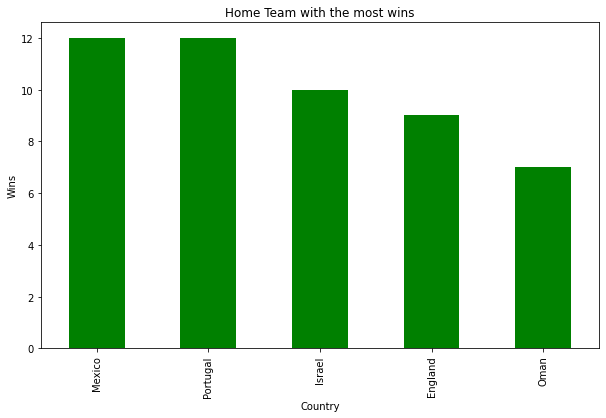

In [ ]:
# Home teams with the most wins
wins= merged_final[(merged_final['status']== 'Win')]
group = wins.groupby(['home_team'])['status'].size().sort_values(ascending= False).head(5)
group.plot(kind = 'bar', title= 'Home Team with the most wins', ylabel = 'Wins' , xlabel = 'Country' , figsize =(10,6) , color = 'green')
plt.show()

Mexico and Portugal were the home teams with the most wins outcome in a match

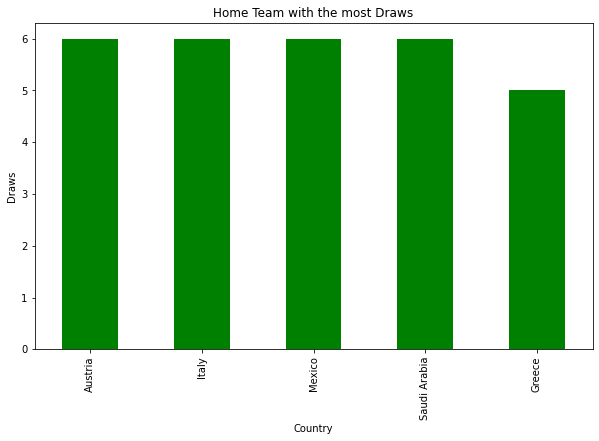

In [ ]:
# Home teams with the most draws
draws= merged_final[(merged_final['status']== 'Draw')]
group_1 = draws.groupby(['home_team'])['status'].size().sort_values(ascending= False).head(5)
group_1.plot(kind = 'bar', title= 'Home Team with the most Draws', ylabel = 'Draws' , xlabel = 'Country' , figsize =(10,6) , color = 'green')
plt.show()

Austria, Italy, Mexico, Saudi Arabia were the home teams with the most draws outcome in a match

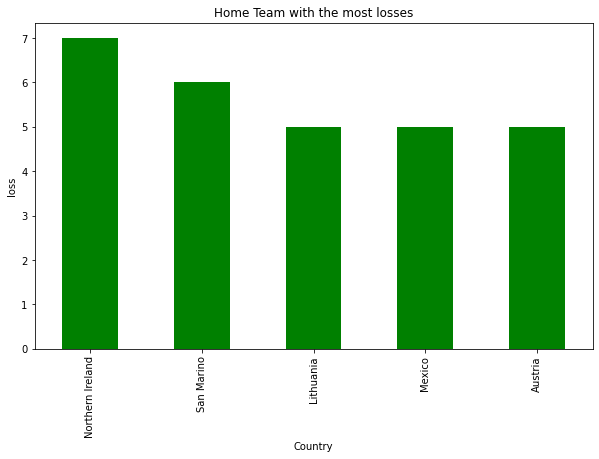

In [ ]:
# Home teams with the most draws
loss = merged_final[(merged_final['status']== 'loss')]
group_2 = loss.groupby(['home_team'])['status'].size().sort_values(ascending= False).head(5)
group_2.plot(kind = 'bar', title= 'Home Team with the most losses', ylabel = 'loss' , xlabel = 'Country' , figsize =(10,6) , color = 'green')
plt.show()

The home team with the most lost matches is Northern Ireland

In [ ]:
# Asses correlation between our variables 
merged_final.corr()

,home_score,away_score,home_team_rank,year,away_team_rank
home_score,1.000000,-0.132413,-0.043381,-0.008058,0.309322
away_score,-0.132413,1.000000,0.143060,-0.044407,-0.151524
home_team_rank,-0.043381,0.143060,1.000000,0.212261,0.534618
year,-0.008058,-0.044407,0.212261,1.000000,0.268029
away_team_rank,0.309322,-0.151524,0.534618,0.268029,1.000000


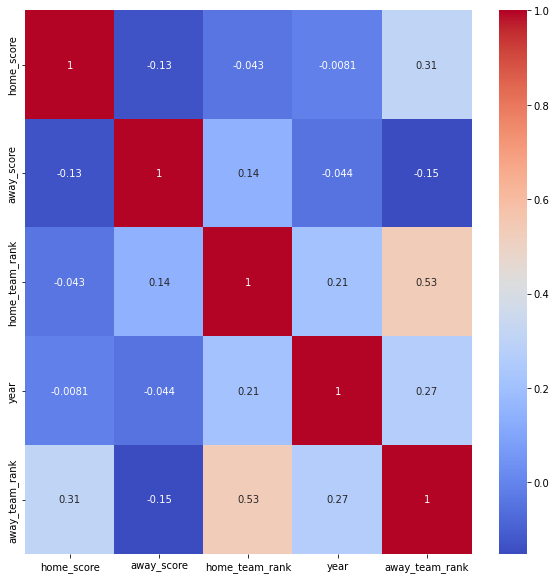

In [ ]:
# Plot a heatmap
fig, heat = plt.subplots(figsize = (10,10))
heat = sns.heatmap(merged_final.corr(), annot = True, cmap = 'coolwarm')

There is a moderately positive correlation between home team rank and away team rank

<Figure size 700x500 with 0 Axes>

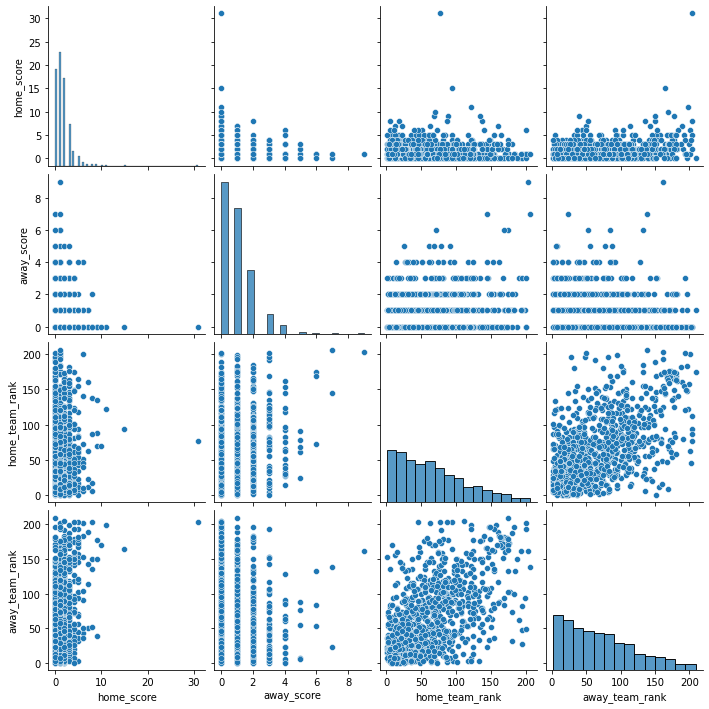

In [ ]:
# Plotting a pairplot of all the numerical values
plt.figure(figsize = (7, 5), dpi=100)
sns.pairplot(merged_final[columns_3])

There is a positive correlation between home team rank and away team rank

##Polynomial regression

In [ ]:
# Narrow down the columns needed in our model
final = merged_final[['home_team', 'away_team', 'home_score', 'away_score','tournament', 'home_team_rank', 'away_team_rank', 'status']]
final.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,59,22,Win
1,Brazil,Mexico,1,1,Friendly,8,14,Draw
2,Ecuador,Venezuela,5,0,FIFA World Cup qualification,35,94,Win
3,Guinea,Sierra Leone,1,0,Friendly,65,86,Win
4,Paraguay,Argentina,1,3,FIFA World Cup qualification,67,5,loss


In [ ]:
# Group tournament column 
def my_function(x):
    if x['tournament'] == 'FIFA World Cup':
         value = 'World Cup'
    elif x['tournament'] == 'FIFA World Cup qualification':
        value = 'World Cup Qulaifications'
    elif x['tournament'] == 'Friendly':
        value = 'Friendly'
    else:
        value = 'Other'
    return value

final['tournament'] = final.apply(my_function, axis=1)
final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,Bolivia,Uruguay,3,1,World Cup Qulaifications,59,22,Win
1,Brazil,Mexico,1,1,Friendly,8,14,Draw
2,Ecuador,Venezuela,5,0,World Cup Qulaifications,35,94,Win
3,Guinea,Sierra Leone,1,0,Friendly,65,86,Win
4,Paraguay,Argentina,1,3,World Cup Qulaifications,67,5,loss
...,...,...,...,...,...,...,...,...
866,England,Costa Rica,2,0,Friendly,12,23,Win
867,Uruguay,Uzbekistan,3,0,Friendly,14,95,Win
868,Portugal,Algeria,3,0,Friendly,4,66,Win
869,Iceland,Ghana,2,2,Friendly,22,47,Draw


In [ ]:
# Encode tournament and Status columns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
final['tournament'] = labelencoder.fit_transform(final['tournament'])
final['status'] = labelencoder.fit_transform(final['status'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# View changes
final

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,status
0,Bolivia,Uruguay,3,1,2,59,22,1
1,Brazil,Mexico,1,1,0,8,14,0
2,Ecuador,Venezuela,5,0,2,35,94,1
3,Guinea,Sierra Leone,1,0,0,65,86,1
4,Paraguay,Argentina,1,3,2,67,5,2
...,...,...,...,...,...,...,...,...
866,England,Costa Rica,2,0,0,12,23,1
867,Uruguay,Uzbekistan,3,0,0,14,95,1
868,Portugal,Algeria,3,0,0,4,66,1
869,Iceland,Ghana,2,2,0,22,47,0


In [ ]:
# Checking for multicollinearlity using VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = final[['home_team_rank','away_team_rank','tournament']]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
print(vif_data)

          feature       VIF
0  home_team_rank  3.448943
1  away_team_rank  3.711231
2      tournament  1.572933


Our VIF values are below 5 hence low multicollinearlity

In [ ]:
# Predicting Home score 
# Get our dependent and independent variables
X= final.iloc[:,4:7].values
y= final.home_score.values

In [ ]:
# Import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Polynomial Regression with 2 degress
# Split the dataset into train and test sets
poly= PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)
# Let's fit our mode
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
# Let's train our model
poly_reg_y_predicted1 = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse= np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted1))
poly_reg_rmse

1.502442283761323

In [ ]:
# Polynomial Regression with 3 degress
# Split the dataset into train and test sets
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)
# Let's fit our mode
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
# Let's train our model
poly_reg_y_predicted2 = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted2))
poly_reg_rmse

1.5813435800911908

In [ ]:
# Polynomial Regression with 4 degress
# Split the dataset into train and test sets
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)
# Let's fit our mode
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
# Let's train our model
poly_reg_y_predicted3 = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted3))
poly_reg_rmse

1.6784203977399959

In [ ]:
# Polynomial Regression with 5 degress
# Split the dataset into train and test sets
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)
# Let's fit our mode
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
# Let's train our model
poly_reg_y_predicted4 = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted4))
poly_reg_rmse

1.7656104013628238

In [ ]:
# Polynomial Regression with 6 degress
# Split the dataset into train and test sets
poly = PolynomialFeatures(degree=6, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)
# Let's fit our mode
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
# Let's train our model
poly_reg_y_predicted5 = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted5))
poly_reg_rmse

1.904699701250208

In [ ]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

1.5036203993158

Polynomial regression Model with 2 degrees has the lowest RSME and performs slightly better than the linear regression model

In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics
folds = KFold(n_splits=10)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 10 models based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
# fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
# assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4078908840432265

Training model 2
Model 2 Root Mean Squared Error: 1.5478353967753877

Training model 3
Model 3 Root Mean Squared Error: 3.2629687851338938

Training model 4
Model 4 Root Mean Squared Error: 1.201398831506142

Training model 5
Model 5 Root Mean Squared Error: 1.8256429742931546

Training model 6
Model 6 Root Mean Squared Error: 1.4330294153766523

Training model 7
Model 7 Root Mean Squared Error: 1.2805897684815608

Training model 8
Model 8 Root Mean Squared Error: 1.234863633766345

Training model 9
Model 9 Root Mean Squared Error: 1.3012215011643045

Training model 10
Model 10 Root Mean Squared Error: 2.0168206679158156


In [ ]:
np.mean(RMSES)

1.6512261858456483

As you can see, the average RSME is higher than the polynomial value (RSME with 2 degrees). However in this case, it might be worthwile to pick model 4

##Residual plots and heteroskedasticity testing

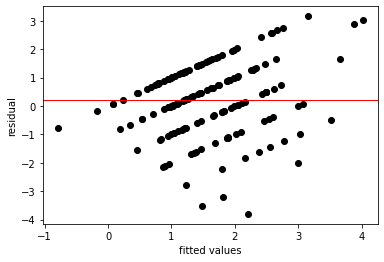

In [ ]:
# Residual Plot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#
X= final.iloc[:,4:7].values
y= final.home_score.values
#
X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, admit_train)
# This is our prediction our model
y_predict = regressor.predict(X_test)
#
residuals = np.subtract(y_predict, admit_test)
# Plot
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# Bartlett Tests
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


309.95255597624623
the variances are homogeneous!


In [ ]:
# Predicting Away score 
# Get our dependent and independent variables
X= final.iloc[:,4:7].values
y= final.away_score.values

In [ ]:
# Polynomial Regression with 2 degress
# Split the dataset into train and test sets
poly= PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)
# Let's fit our mode
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
# Let's train our model
poly_reg_y_predicted2 = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted2))
poly_reg_rmse

1.05945721801022

In [ ]:
# Polynomial Regression with 3 degress
# Split the dataset into train and test sets
poly= PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)
# Let's fit our mode
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
# Let's train our model
poly_reg_y_predicted3 = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted3))
poly_reg_rmse

1.072654924566966

In [ ]:
# Polynomial Regression with 4 degress
# Split the dataset into train and test sets
poly= PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)
# Let's fit our mode
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
# Let's train our model
poly_reg_y_predicted4 = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse= np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted4))
poly_reg_rmse

1.0988139794802863

In [ ]:
# Polynomial Regression with 5 degress
# Split the dataset into train and test sets
poly= PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)
# Let's fit our mode
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
# Let's train our model
poly_reg_y_predicted5 = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse= np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted5))
poly_reg_rmse

1.129670317995226

In [ ]:
# Polynomial Regression with 6 degress
# Split the dataset into train and test sets
poly= PolynomialFeatures(degree=6, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=10)
# Let's fit our mode
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
# Let's train our model
poly_reg_y_predicted6 = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse= np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted6))
poly_reg_rmse

1.2521047648840815

In [ ]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

1.0448814140422515

The 2 degree has the smallest RSME

The linear regression model is slightly better than the polynomial model

In [ ]:
# Cross Validation
from sklearn.model_selection import KFold

folds = KFold(n_splits=10)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 10 models based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
# fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
# assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.1047529520876198

Training model 2
Model 2 Root Mean Squared Error: 0.9898821124043281

Training model 3
Model 3 Root Mean Squared Error: 1.285680695506619

Training model 4
Model 4 Root Mean Squared Error: 1.1854104325152275

Training model 5
Model 5 Root Mean Squared Error: 1.1917251548868109

Training model 6
Model 6 Root Mean Squared Error: 1.1887297642672603

Training model 7
Model 7 Root Mean Squared Error: 1.0990057896292984

Training model 8
Model 8 Root Mean Squared Error: 0.8717858856998244

Training model 9
Model 9 Root Mean Squared Error: 1.0872593129516046

Training model 10
Model 10 Root Mean Squared Error: 0.9799388158443268


In [ ]:
np.mean(RMSES)

1.0984170915792921

As you can see, the average RSME is higher than  the polynomial value (RSME with 2 degrees). However in this case, it might be worthwile to pick model 8 

##Residual plots and heteroskedasticity testing

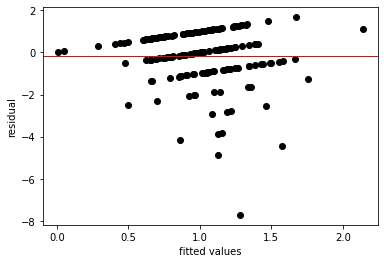

In [ ]:
# Residual Plot
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#
X= final.iloc[:,4:7].values
y= final.away_score.values
#
X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, admit_train)
# This is our prediction our model
y_predict = regressor.predict(X_test)
#
residuals = np.subtract(y_predict, admit_test)
# Plot
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# Bartlett Tests
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


##Logistic Regression

In [ ]:
# Splitting our dataset
#
X = final[['home_score', 'away_score', 'tournament',
       'home_team_rank', 'away_team_rank']]
y= final['status']

In [ ]:
# Split to test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [ ]:
# Fitting our model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Using our model to make a prediction
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 70,   0,   0],
       [  0, 129,   0],
       [  0,   0,  63]])

In [ ]:
# Accurracy level
score = LogReg.score(X_test, y_test)
print(score)

1.0


In [ ]:
# Hyperparameter Tuning
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
# Creating the logistic regression
logistic = linear_model.LogisticRegression()
# Creating regularization penalty space
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# Creating hyperparameter options grid 
hyperparameters = dict(solver=solvers,penalty=penalty,C=c_values)
# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [ ]:
# Fitting grid search
best_model = clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 100


In [ ]:
# Predicting target vector
best_model.predict(X)

array([1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0,
       1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1,
       1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1,
       1, 1, 2, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1,
       1, 1, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1,
       0, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0,
       1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0,

In [ ]:
# Check the score
print(clf.best_score_)

1.0


Conclusion 

Polynomial model performed slightly better that the linear regression model when trying to predict home score 

The Logistic regression model performed really well. Hence can predict the outcome of a match

Did we have the right data?

Yes. 

Do we need other data to answer our question?

Yes

Did we have the right question?

Yes.